In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("file:///F:/2021_registered_companies.csv")
df.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000.0,102000.0,45309.0,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000.0,3000.0,74994.0,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000.0,500000.0,65990.0,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000.0,10000.0,72900.0,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000.0,500000.0,72900.0,Business Services


In [5]:
df.shape

(54894, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_uid           54894 non-null  object 
 1   date_of_registration  54894 non-null  object 
 2   month_name            54894 non-null  object 
 3   state                 54894 non-null  object 
 4   roc                   54894 non-null  object 
 5   category              54894 non-null  object 
 6   class                 54894 non-null  object 
 7   company_type          54894 non-null  object 
 8   authorized_capital    54894 non-null  float64
 9   paidup_capital        54894 non-null  float64
 10  activity_code         54894 non-null  float64
 11  activity_description  54894 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.0+ MB


In [9]:
df['authorized_capital']=df['authorized_capital'].astype('int')
df['paidup_capital']=df['paidup_capital'].astype('int')
df['activity_code']=df['activity_code'].astype('int')


In [10]:
df = df.drop('date_of_registration', axis = 1) 

In [11]:
index = df.month_name.value_counts().keys().tolist()
counts = df.month_name.value_counts().tolist()  

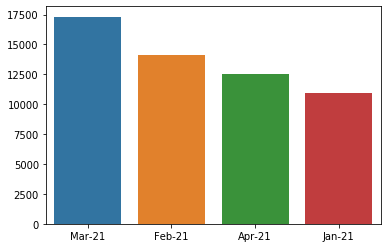

In [12]:
sns.barplot(index,counts)
plt.show()

In [13]:
df.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'MH', 'TG', 'GJ', 'CH', 'DL', 'HR', 'UP', 'RJ',
       'CT', 'KL', 'WB', 'KA', 'MP', 'PB', 'BR', 'MN', 'TN', 'OR', 'HP',
       'UR', 'JH', 'AP', 'GA', 'AS', 'DN', 'TR', 'JK', 'PY', 'MZ', 'NL',
       'AN', 'AR', 'LD', 'ML', 'LH', 'Arunachal Pradesh', 'Mizoram',
       'Ladakh'], dtype=object)

In [14]:
state_code ={'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Jammu & Kashmir'
,'DD': 'Daman and Diu'
     }

In [18]:
df.replace({"state": state_code},inplace=True)

In [19]:
df.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'Mizoram', 'Arunachal Pradesh', 'Ladakh'],
      dtype=object)

In [20]:
index = df.state.value_counts().keys().tolist()
counts = df.state.value_counts().tolist()  

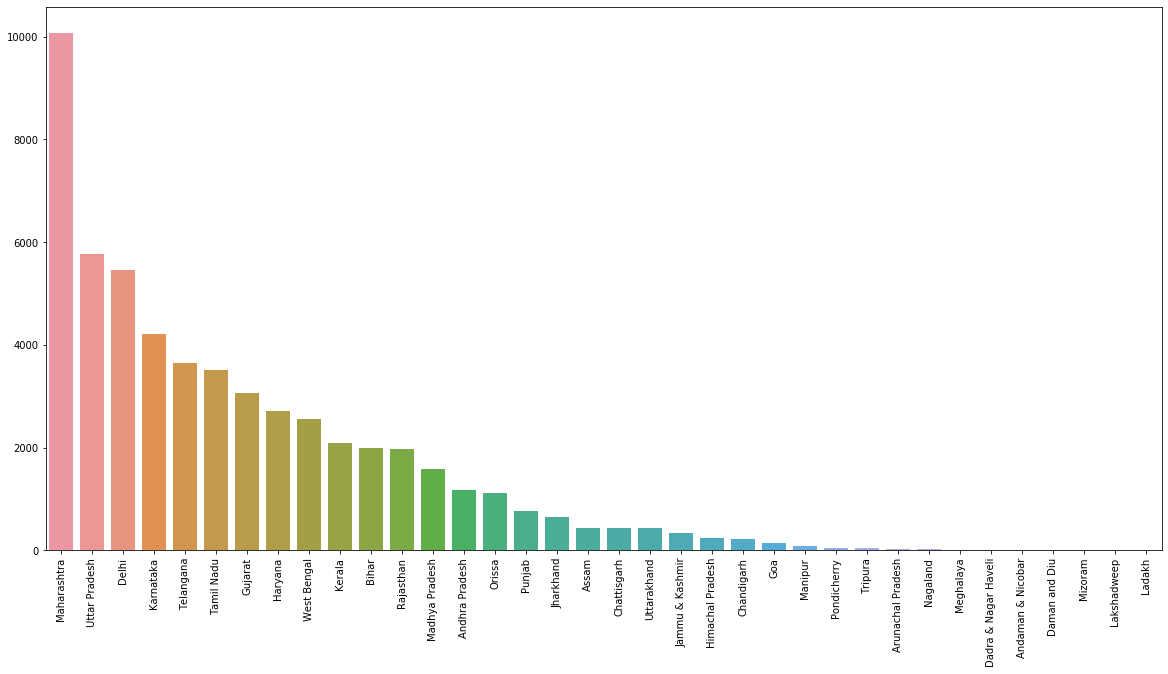

In [22]:
plt.figure(figsize= (20,10))

sns.barplot(index,counts)
plt.xticks(rotation = 90)
plt.show()

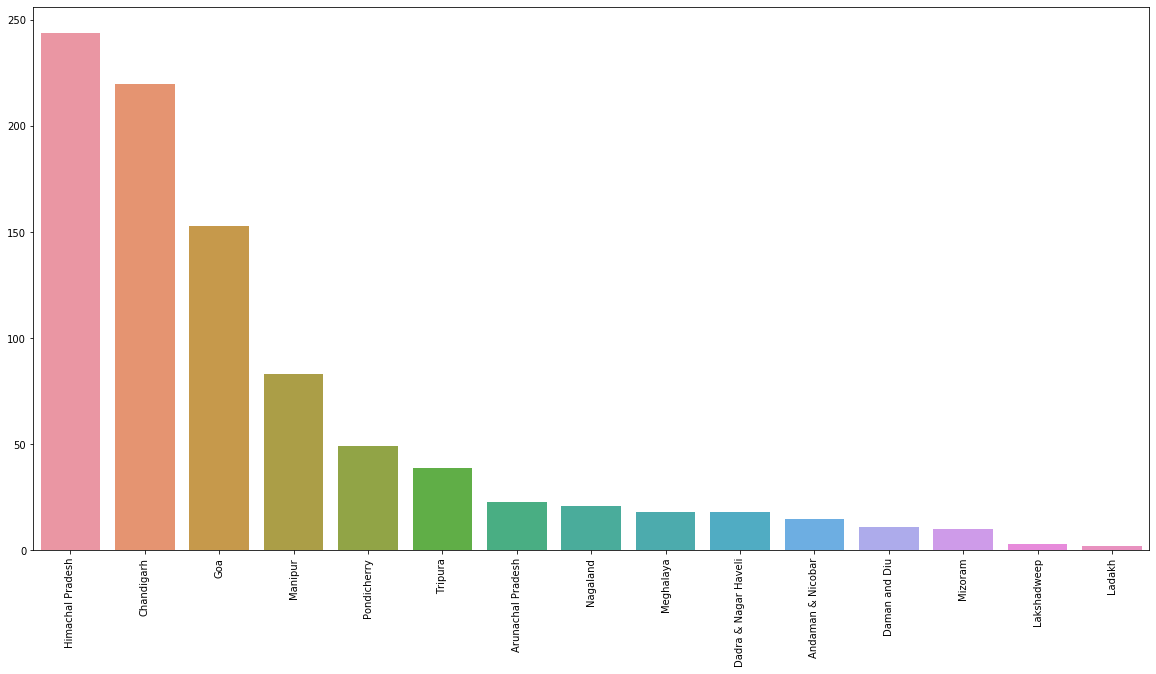

In [23]:
plt.figure(figsize= (20,10))

sns.barplot(index[-15:],counts[-15:])
plt.xticks(rotation = 90)
plt.show()

In [24]:
registered_jan = df[df['month_name'] == 'Jan-21'].groupby(['state']).count()

In [25]:
state_index = registered_jan.index.tolist()

In [26]:
count_jan = registered_jan['company_uid'].tolist()

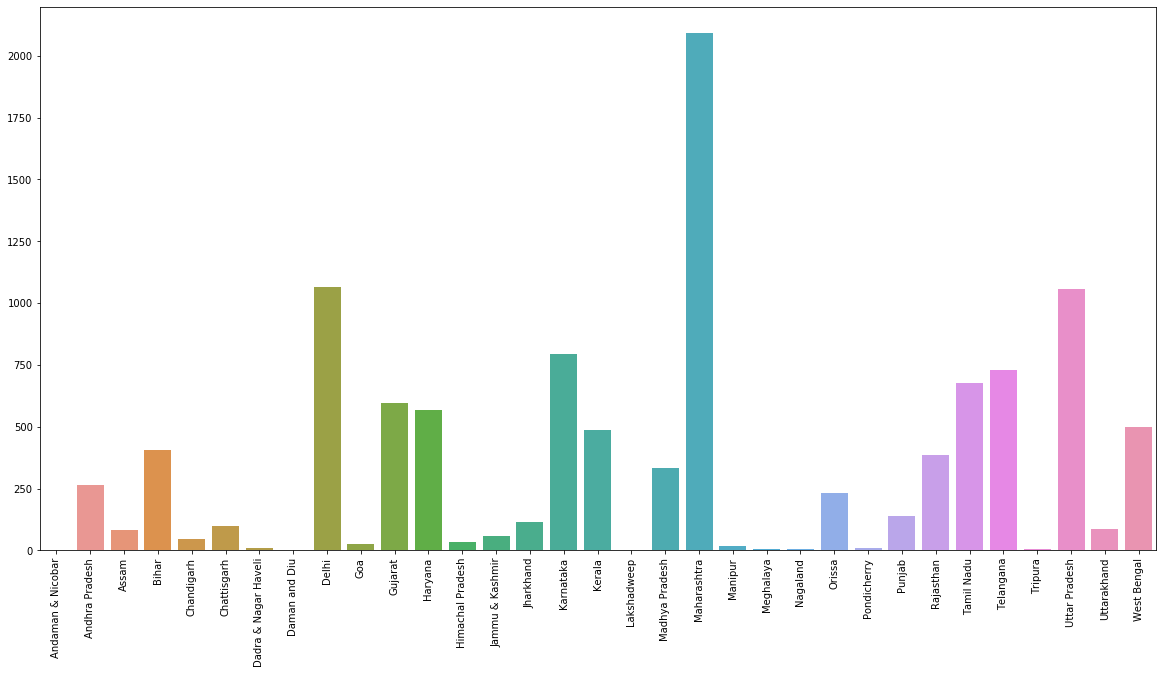

In [27]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_jan)
plt.xticks(rotation = 90)
plt.show()

In [29]:
registered_feb = df[df['month_name'] == 'Feb-21'].groupby(['state']).count()

In [30]:
state_index = registered_feb.index.tolist()

In [31]:
count_feb= registered_feb['company_uid'].tolist()

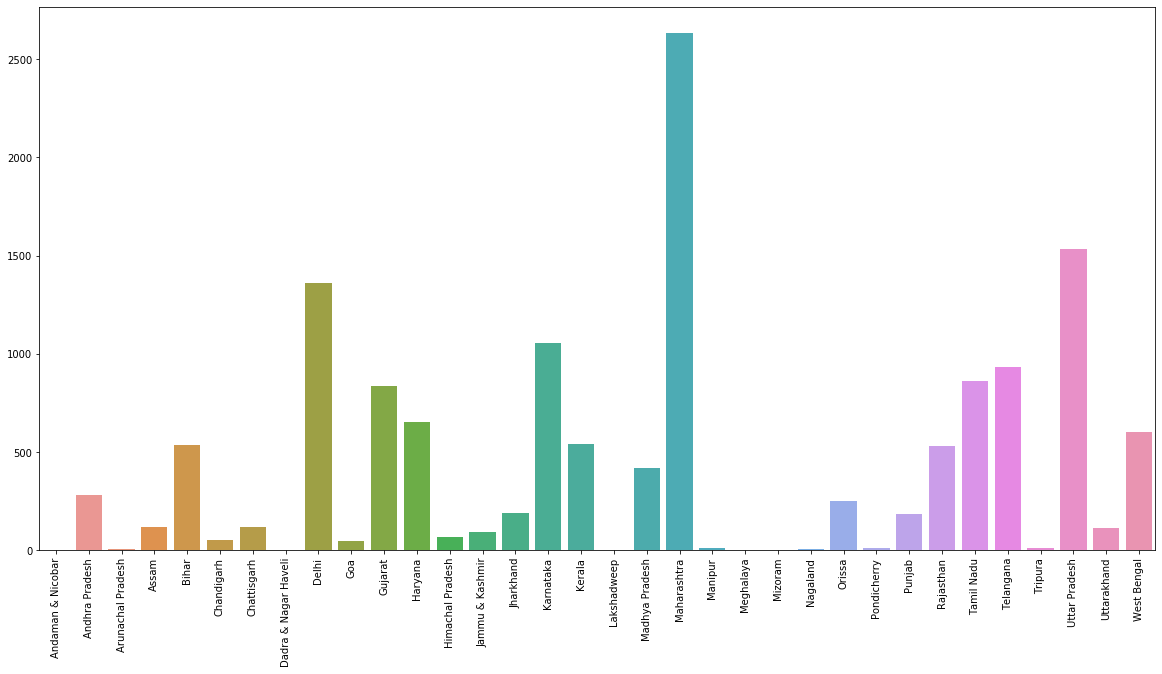

In [32]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_feb)
plt.xticks(rotation = 90)
plt.show()

In [34]:
registered_march = df[df['month_name'] == 'Mar-21'].groupby(['state']).count()

In [35]:
state_index = registered_march.index.tolist()

In [36]:
count_march = registered_march['company_uid'].tolist()

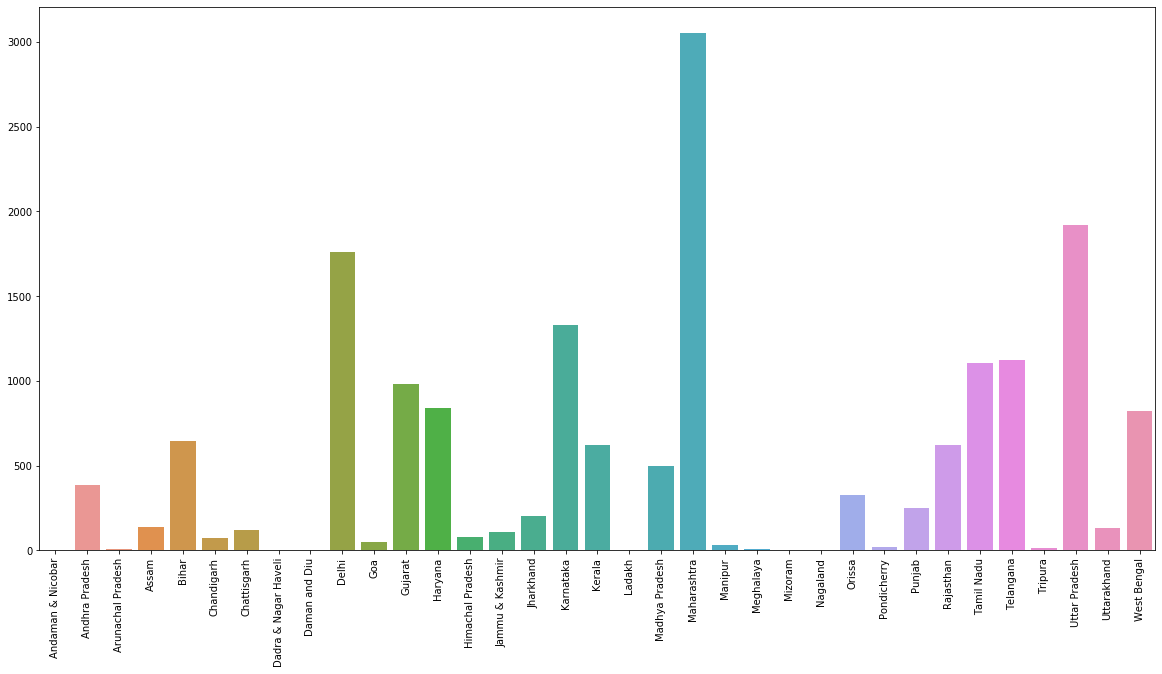

In [37]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_march)
plt.xticks(rotation = 90)
plt.show()

In [38]:
registered_april = df[df['month_name'] == 'Apr-21'].groupby(['state']).count()
state_index = registered_april.index.tolist()

In [39]:
count_apr = registered_april['company_uid'].tolist()

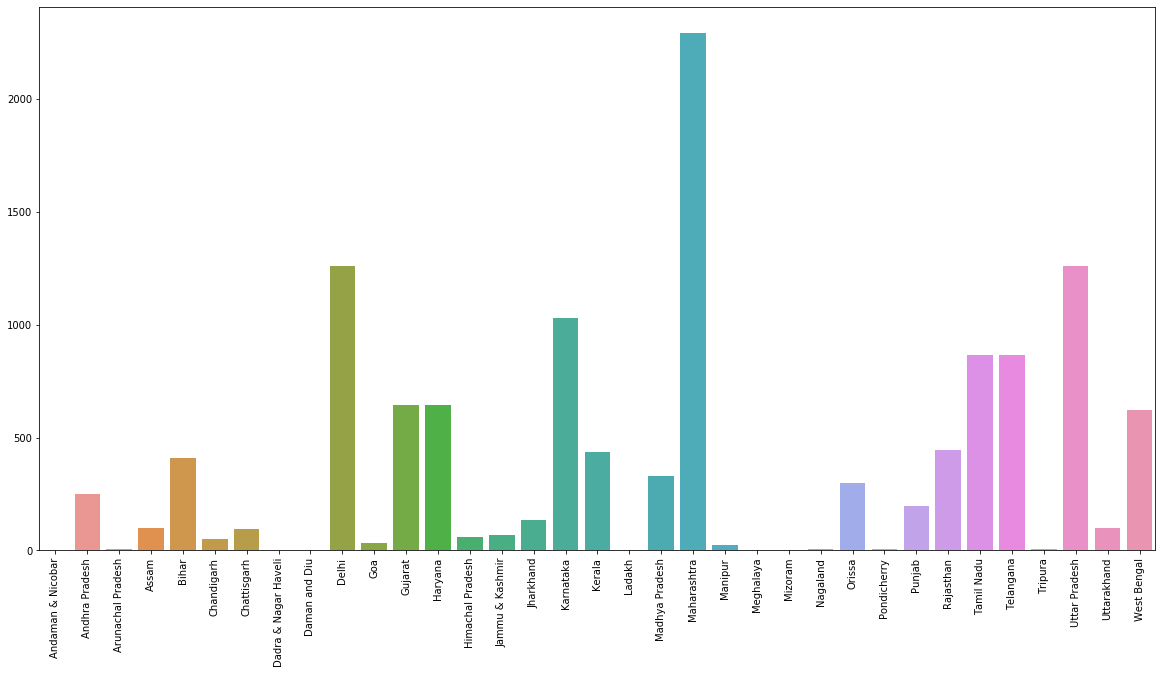

In [40]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_apr)
plt.xticks(rotation = 90)
plt.show()

In [41]:
df.category.unique()

array(['Company limited by Shares', 'Company Limited by Guarantee'],
      dtype=object)

In [42]:
category = df.category.value_counts().keys().tolist()
counts = df.category.value_counts().tolist()  

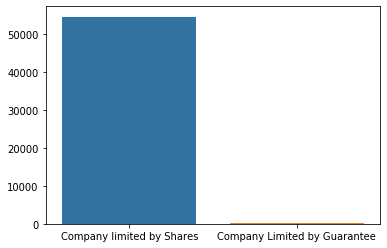

In [43]:
sns.barplot(category,counts)
plt.show()

In [45]:
states_clg = df[df['category'] == 'Company Limited by Guarantee'].groupby(['state']).count()

In [46]:
states_clg.index.tolist()

['Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chattisgarh',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Orissa',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [48]:
df['class'].unique()

array(['Private', 'Public', 'Private(One Person Company)'], dtype=object)

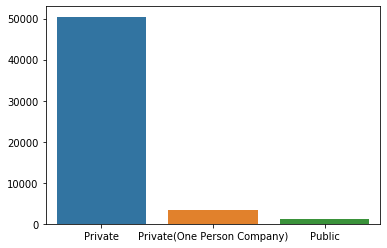

In [50]:
company_class = df['class'].value_counts().keys().tolist()
counts = df['class'].value_counts().tolist()
sns.barplot(company_class,counts)
plt.show()

In [52]:
df['company_type'].value_counts()

Non-govt company                  54389
Subsidiary of Foreign Company       430
Guarantee and Association comp       50
State Govt company                   19
Union Govt company                    6
Name: company_type, dtype: int64

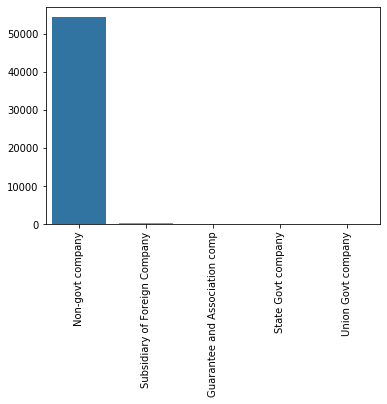

In [54]:
company_type = df['company_type'].value_counts().keys().tolist()
counts = df['company_type'].value_counts().tolist()


sns.barplot(company_type,counts)
plt.xticks(rotation = 90)
plt.show()

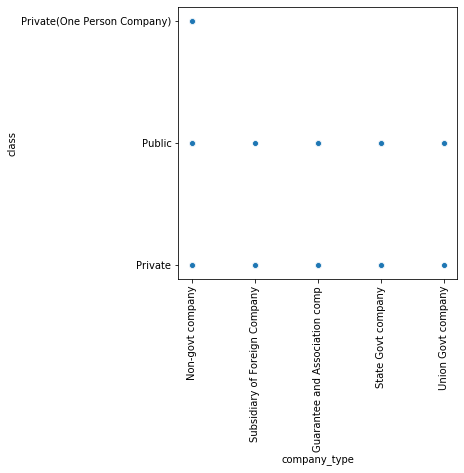

In [56]:
plt.figure(figsize = (5,5))
sns.scatterplot(df['company_type'],df['class'])
plt.xticks(rotation = 90)
plt.show()

In [57]:
df.head()

,company_uid,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000,102000,45309,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000,3000,74994,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000,500000,65990,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000,10000,72900,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000,500000,72900,Business Services


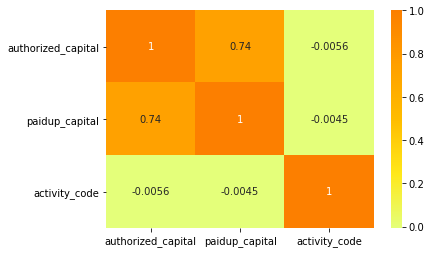

In [60]:

#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

In [ ]:
df.hist(figsize=(20,20))

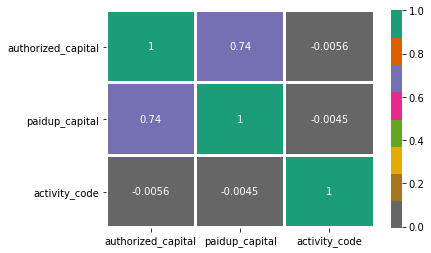

In [61]:
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [62]:
df.columns

Index(['company_uid', 'month_name', 'state', 'roc', 'category', 'class',
       'company_type', 'authorized_capital', 'paidup_capital', 'activity_code',
       'activity_description'],
      dtype='object')

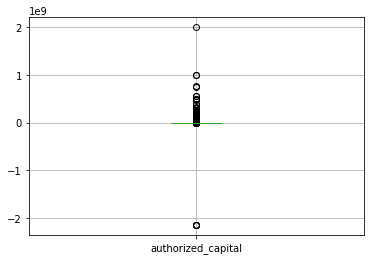

In [65]:
df.boxplot(column='authorized_capital')

In [66]:
import sweetviz as sv

In [67]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [68]:
from IPython.display import IFrame

In [69]:
IFrame(src='Analyze.html',width=1000,height=600)